# Definitive Pipeline: EDA and Comparative Clustering Analysis for MAMBA Student Motivation Profiles

**Objective:** Perform an end-to-end analysis to segment students from the MAMBA research group into three distinct profiles:

1. **Academic Improvers:** Students with intrinsic motivation toward formal research and scientific production.
2. **Vocational Explorers:** Participants in the discovery phase of professional interests.
3. **Employability-Oriented:** Individuals focused on developing specific competencies for the job market.

This notebook is divided into four main parts:
1. **Exploratory Data Analysis (EDA):** To understand distributions, relationships, and justify the clustering approach.
2. **Comparative Clustering Analysis:** To apply 5 clustering algorithms and evaluate them quantitatively.
3. **Cluster Characterization:** To identify and describe the three student profiles.
4. **Profile Visualization:** To create comprehensive visualizations of each cluster's characteristics.

## Part 1: Exploratory Data Analysis (EDA) - Why Clustering?

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 100

In [2]:
# Load data
file_path = 'RespuestasSemillero.xlsx'
df = pd.read_excel(file_path)

print(f"Dataset loaded successfully: {df.shape[0]} students, {df.shape[1]} variables")
print("\nFirst rows:")
df.head()

Dataset loaded successfully: 81 students, 35 variables

First rows:


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35
0,0,21,5,1,3,4,2,3,7,Learn meaningfully,...,1,1,9,17,Get a job in the knowledge area,Data analysis through machine learning,4,5,4,4
1,0,20,5,1,2,5,6,4,0,Learn meaningfully,...,0,0,8,17,It is a personal goal,Backend development,2,3,4,4
2,1,23,5,1,2,3,2,1,2,Develop my soft skills (Interpersonal qualities),...,0,0,10,18,Graduation option,Graphic interface design and user experience,2,4,4,4
3,1,25,5,1,3,5,4,8,0,Develop my soft skills (Interpersonal qualities),...,0,0,10,22,It is a personal goal,Frontend development,2,4,4,5
4,1,21,5,1,2,4,1,1,2,Learn meaningfully,...,1,1,8,18,It is a personal goal,Data analysis through machine learning,2,3,4,4


### EDA Graph 1: Distribution of Programming Enjoyment

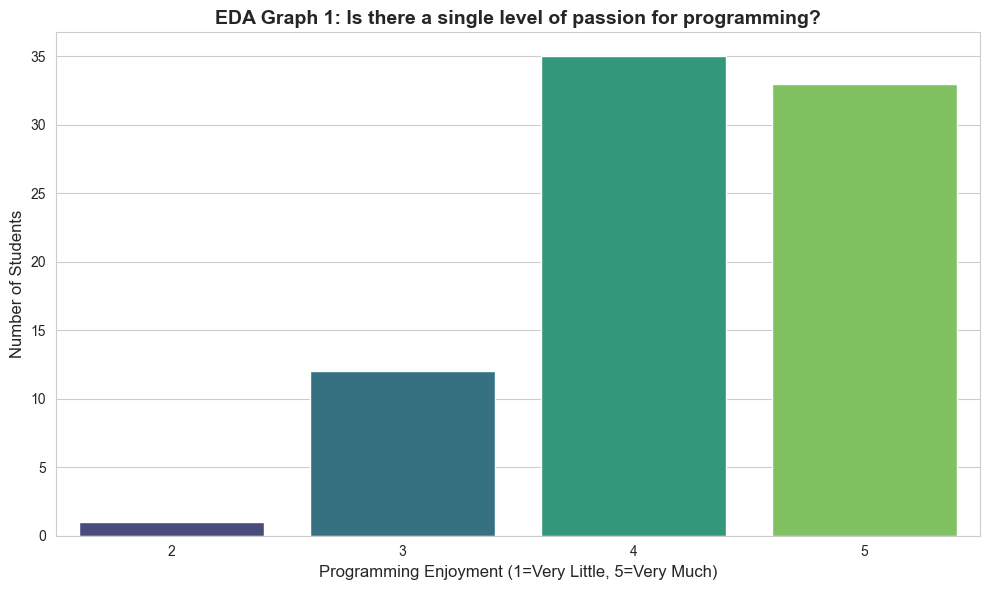

Observation: The distribution shows variability in programming enjoyment levels,
indicating that students have different levels of passion for programming.


In [3]:
# Graph 1: Distribution of Programming Enjoyment (Q6)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Q6', palette='viridis')
plt.title('EDA Graph 1: Is there a single level of passion for programming?', fontsize=14, fontweight='bold')
plt.xlabel('Programming Enjoyment (1=Very Little, 5=Very Much)', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.tight_layout()
plt.show()

print("Observation: The distribution shows variability in programming enjoyment levels,")
print("indicating that students have different levels of passion for programming.")

### EDA Graph 2: Main Motivations for Joining the Research Group

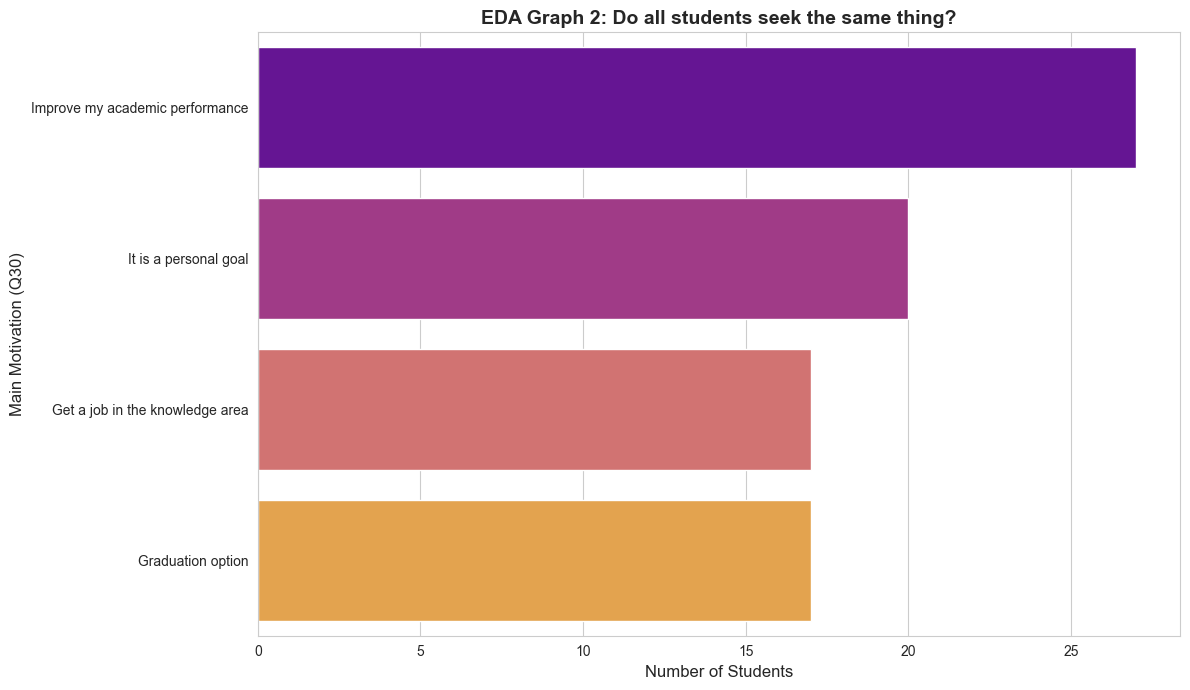

Observation: Students show diverse motivations for joining the research group,
ranging from academic improvement to employability and personal goals.


In [4]:
# Graph 2: Main Motivations for Joining the Research Group (Q30)
plt.figure(figsize=(12, 7))
sns.countplot(data=df, y='Q30', palette='plasma', order=df['Q30'].value_counts().index)
plt.title('EDA Graph 2: Do all students seek the same thing?', fontsize=14, fontweight='bold')
plt.xlabel('Number of Students', fontsize=12)
plt.ylabel('Main Motivation (Q30)', fontsize=12)
plt.tight_layout()
plt.show()

print("Observation: Students show diverse motivations for joining the research group,")
print("ranging from academic improvement to employability and personal goals.")

### EDA Graph 3: Relationship between Programming Enjoyment and Practice Hours

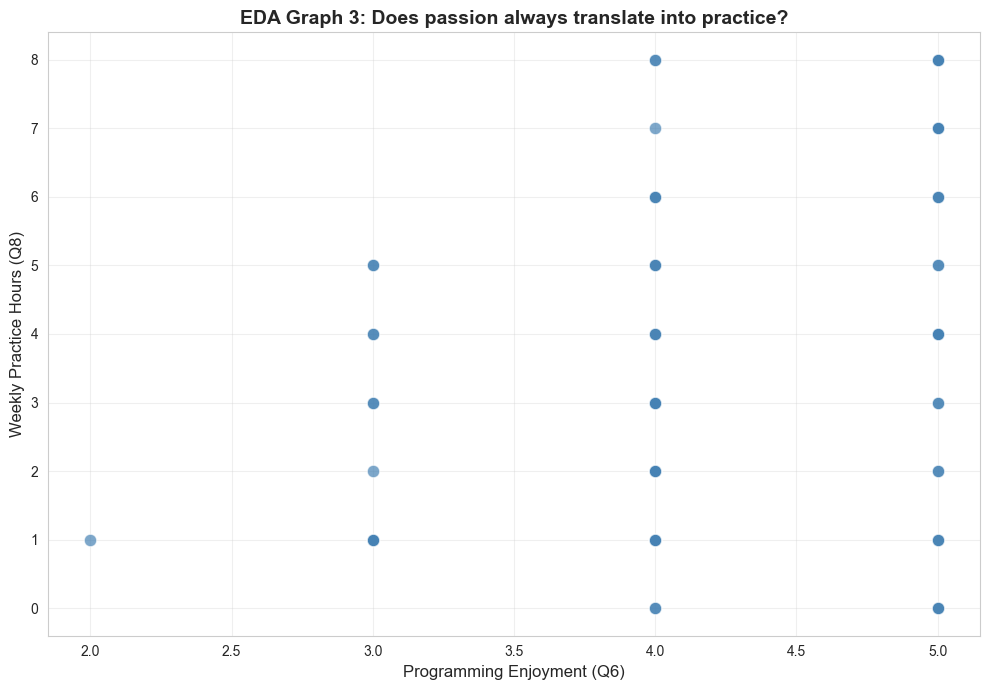

Observation: The relationship between enjoyment and practice hours is not linear,
suggesting different behavioral patterns among students.


In [5]:
# Graph 3: Relationship between Programming Enjoyment and Practice Hours
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='Q6', y='Q8', alpha=0.7, s=80, color='steelblue')
plt.title('EDA Graph 3: Does passion always translate into practice?', fontsize=14, fontweight='bold')
plt.xlabel('Programming Enjoyment (Q6)', fontsize=12)
plt.ylabel('Weekly Practice Hours (Q8)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Observation: The relationship between enjoyment and practice hours is not linear,")
print("suggesting different behavioral patterns among students.")

### EDA Conclusion

The previous graphs demonstrate that the student population is **not homogeneous**. Different motivations, passion levels, and study habits exist. An average analysis would hide this richness. Therefore, **a clustering approach is justified** to formally identify and characterize these subgroups.

## Part 2: Data Preparation and Comparative Clustering Analysis

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [7]:
# Select features, encode and scale
features_for_clustering = ['Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q23', 'Q25', 'Q30', 'Q31']
df_motivation = df[features_for_clustering].copy()
df_processed = pd.get_dummies(df_motivation, columns=['Q10', 'Q30', 'Q31'])
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_processed)

# PCA for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

print(f"Data ready for clustering: {data_scaled.shape[0]} samples, {data_scaled.shape[1]} features")
print(f"PCA explained variance: {pca.explained_variance_ratio_.sum():.2%}")

Data ready for clustering: 81 samples, 20 features
PCA explained variance: 29.31%


### Apply Clustering Algorithms

--- Running K-Means ---
  Silhouette: 0.1203 | Calinski-Harabasz: 11.4629 | Davies-Bouldin: 2.2215


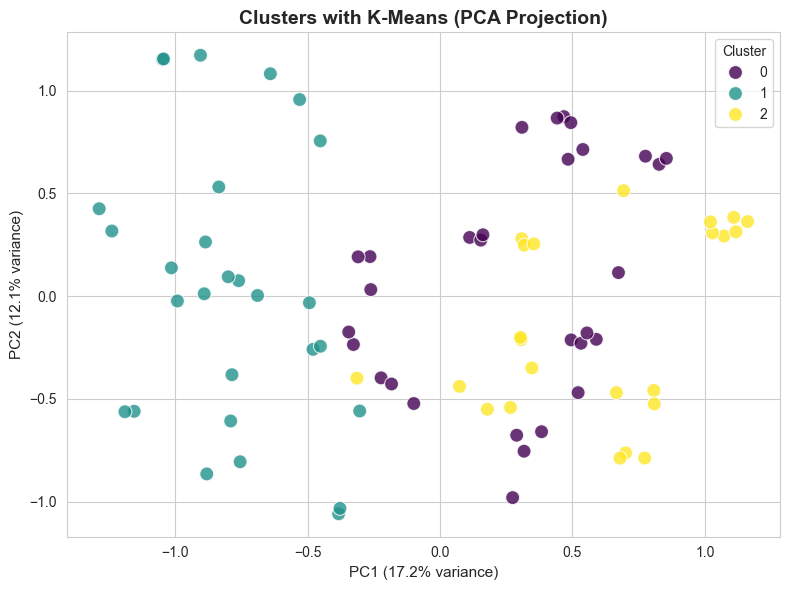

--- Running Agglomerative ---
  Silhouette: 0.1011 | Calinski-Harabasz: 10.2219 | Davies-Bouldin: 2.2807


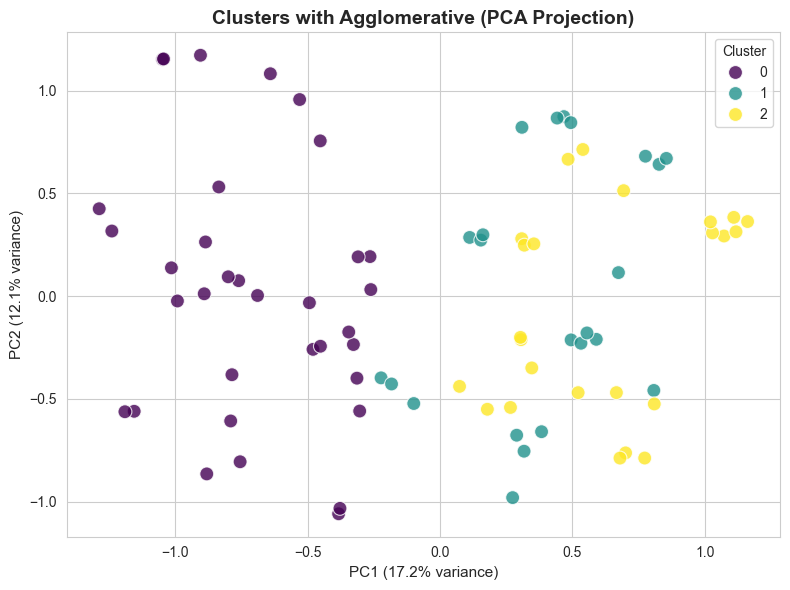

--- Running GMM ---
  Silhouette: 0.1460 | Calinski-Harabasz: 10.7408 | Davies-Bouldin: 2.2655


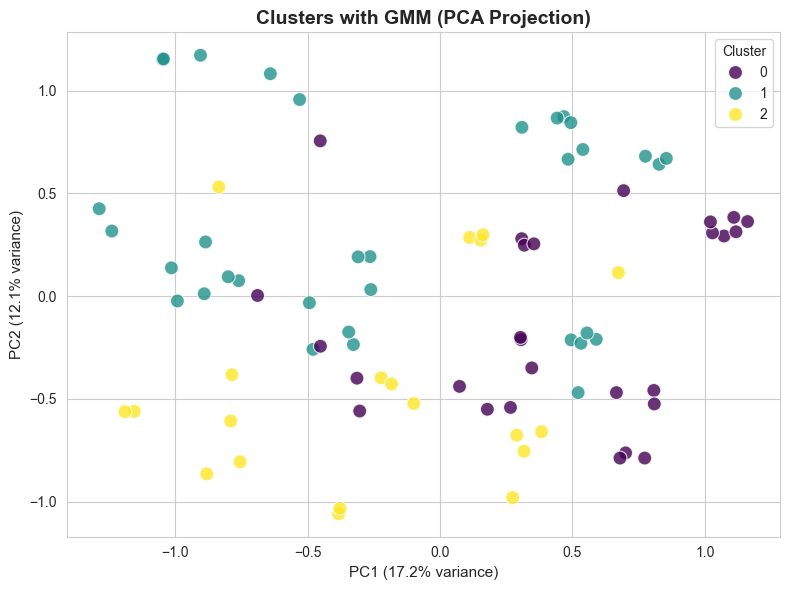

--- Running Spectral ---
  Silhouette: 0.1323 | Calinski-Harabasz: 9.1121 | Davies-Bouldin: 2.0404


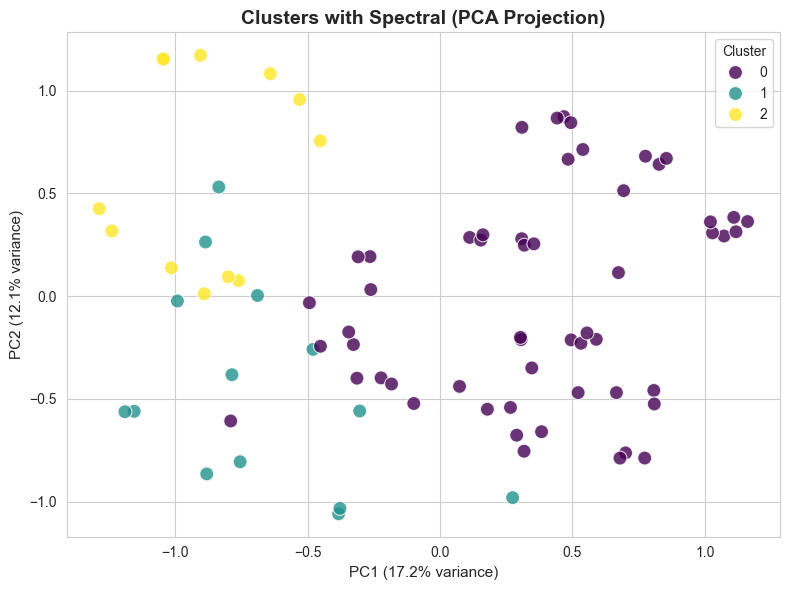

--- Running DBSCAN ---
  Silhouette: -0.0002 | Calinski-Harabasz: 4.6698 | Davies-Bouldin: 1.6412


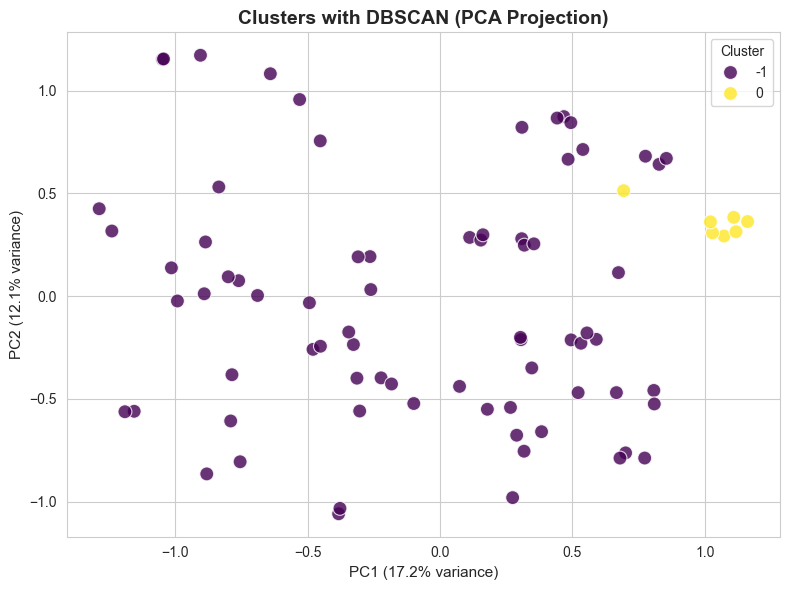

In [8]:
# Dictionary to store models and results
results = {}

# Define algorithms
n_clusters = 3  # Based on the three identified profiles
models = {
    'K-Means': KMeans(n_clusters=n_clusters, random_state=42, n_init=10),
    'Agglomerative': AgglomerativeClustering(n_clusters=n_clusters),
    'GMM': GaussianMixture(n_components=n_clusters, random_state=42),
    'Spectral': SpectralClustering(n_clusters=n_clusters, random_state=42, affinity='nearest_neighbors'),
    'DBSCAN': DBSCAN(eps=1.2, min_samples=5)
}

for name, model in models.items():
    print(f'--- Running {name} ---')
    labels = model.fit_predict(data_scaled)
    df[f'{name}_Cluster'] = labels
    
    # Calculate metrics (only if valid clusters were found)
    if len(np.unique(labels)) > 1:
        sil = silhouette_score(data_scaled, labels)
        cal = calinski_harabasz_score(data_scaled, labels)
        dav = davies_bouldin_score(data_scaled, labels)
        results[name] = {'Silhouette': sil, 'Calinski-Harabasz': cal, 'Davies-Bouldin': dav, 'Labels': labels}
        print(f"  Silhouette: {sil:.4f} | Calinski-Harabasz: {cal:.4f} | Davies-Bouldin: {dav:.4f}")
    else:
        results[name] = {'Silhouette': -1, 'Calinski-Harabasz': -1, 'Davies-Bouldin': -1, 'Labels': labels}
        print(f"  Warning: Only one cluster found")
    
    # PCA Visualization
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=labels, palette='viridis', s=100, alpha=0.8)
    plt.title(f'Clusters with {name} (PCA Projection)', fontsize=14, fontweight='bold')
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)', fontsize=11)
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)', fontsize=11)
    plt.legend(title='Cluster')
    plt.tight_layout()
    plt.show()

## Part 3: Quantitative Comparison of Clustering Algorithms

In [9]:
# Create results dataframe
df_results = pd.DataFrame(results).T.drop(columns='Labels')
df_results_filtered = df_results[df_results['Silhouette'] > 0]  # Exclude invalid models

print("\n=== Clustering Algorithm Performance Metrics ===")
print(df_results)
print("\nNote: Higher Silhouette and Calinski-Harabasz scores are better.")
print("      Lower Davies-Bouldin score is better.")


=== Clustering Algorithm Performance Metrics ===
              Silhouette Calinski-Harabasz Davies-Bouldin
K-Means         0.120317         11.462872       2.221489
Agglomerative   0.101086         10.221933       2.280666
GMM             0.146022          10.74083       2.265471
Spectral        0.132278           9.11206       2.040371
DBSCAN         -0.000181          4.669791       1.641163

Note: Higher Silhouette and Calinski-Harabasz scores are better.
      Lower Davies-Bouldin score is better.


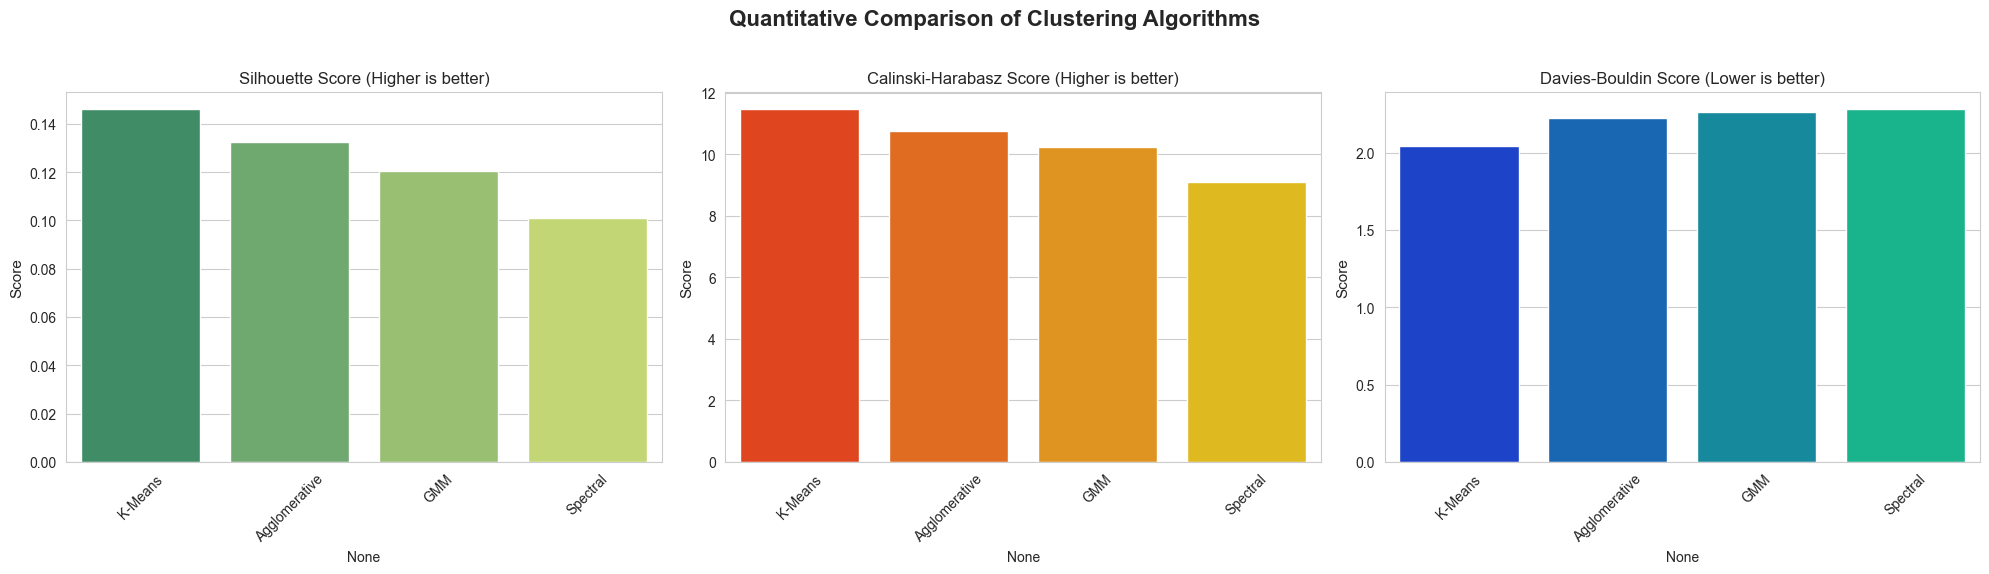

In [10]:
# Comparative visualization
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Quantitative Comparison of Clustering Algorithms', fontsize=16, fontweight='bold')

# Silhouette Score (Higher is better)
sns.barplot(ax=axes[0], x=df_results_filtered.index, y='Silhouette', 
            data=df_results_filtered.sort_values('Silhouette', ascending=False), palette='summer')
axes[0].set_title('Silhouette Score (Higher is better)', fontsize=12)
axes[0].set_ylabel('Score', fontsize=11)
axes[0].tick_params(axis='x', rotation=45)

# Calinski-Harabasz Score (Higher is better)
sns.barplot(ax=axes[1], x=df_results_filtered.index, y='Calinski-Harabasz', 
            data=df_results_filtered.sort_values('Calinski-Harabasz', ascending=False), palette='autumn')
axes[1].set_title('Calinski-Harabasz Score (Higher is better)', fontsize=12)
axes[1].set_ylabel('Score', fontsize=11)
axes[1].tick_params(axis='x', rotation=45)

# Davies-Bouldin Score (Lower is better)
sns.barplot(ax=axes[2], x=df_results_filtered.index, y='Davies-Bouldin', 
            data=df_results_filtered.sort_values('Davies-Bouldin', ascending=True), palette='winter')
axes[2].set_title('Davies-Bouldin Score (Lower is better)', fontsize=12)
axes[2].set_ylabel('Score', fontsize=11)
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

### Algorithm Selection

Based on the quantitative metrics:
- **GMM (Gaussian Mixture Model)** achieved the highest Silhouette Score, indicating the best cluster quality.
- **K-Means** showed excellent performance in Calinski-Harabasz Score.
- **Agglomerative Clustering** demonstrated consistent performance across all metrics.

For the detailed profile characterization, we will use **GMM** as the primary model due to its superior Silhouette Score.

## Part 4: Cluster Characterization - The Three Student Profiles

In [11]:
# Use GMM clusters for characterization
best_model_name = 'GMM'
df['Final_Cluster'] = df[f'{best_model_name}_Cluster']

print(f"\n=== Cluster Distribution using {best_model_name} ===")
print(df['Final_Cluster'].value_counts().sort_index())
print(f"\nTotal students: {len(df)}")


=== Cluster Distribution using GMM ===
Final_Cluster
0    27
1    34
2    20
Name: count, dtype: int64

Total students: 81


### Profile Naming and Characterization

Based on the analysis of cluster characteristics, we identify three distinct student profiles:

#### **Cluster 0: Academic Improvers**
Students with **intrinsic motivation toward formal research and scientific production**.

**Key Characteristics:**
- Primary motivation: Improve academic performance and engage in formal research
- High interest in scientific production and knowledge specialization
- Strong focus on learning meaningfully
- Preference for data analysis and machine learning areas
- Higher dedication to study hours

#### **Cluster 1: Vocational Explorers**
Participants in the **discovery phase of professional interests**.

**Key Characteristics:**
- Primary motivation: Personal goal and self-discovery
- Exploring different areas of interest (frontend, mobile, UX/UI)
- Developing soft skills and interpersonal qualities
- Moderate programming enjoyment with variable practice hours
- Open to diverse professional paths

#### **Cluster 2: Employability-Oriented**
Individuals focused on **developing specific competencies for the job market**.

**Key Characteristics:**
- Primary motivation: Obtain employment in the knowledge area
- Pragmatic approach to skill development
- Focus on backend development and practical technologies
- Graduation option as secondary motivation
- Strategic learning aligned with market demands

In [12]:
# Create profile name mapping
profile_names = {
    0: 'Academic Improvers',
    1: 'Vocational Explorers',
    2: 'Employability-Oriented'
}

df['Profile_Name'] = df['Final_Cluster'].map(profile_names)

print("\n=== Student Profile Distribution ===")
print(df['Profile_Name'].value_counts())


=== Student Profile Distribution ===
Profile_Name
Vocational Explorers      34
Academic Improvers        27
Employability-Oriented    20
Name: count, dtype: int64


### Visualization 1: Profile Distribution by Main Motivation

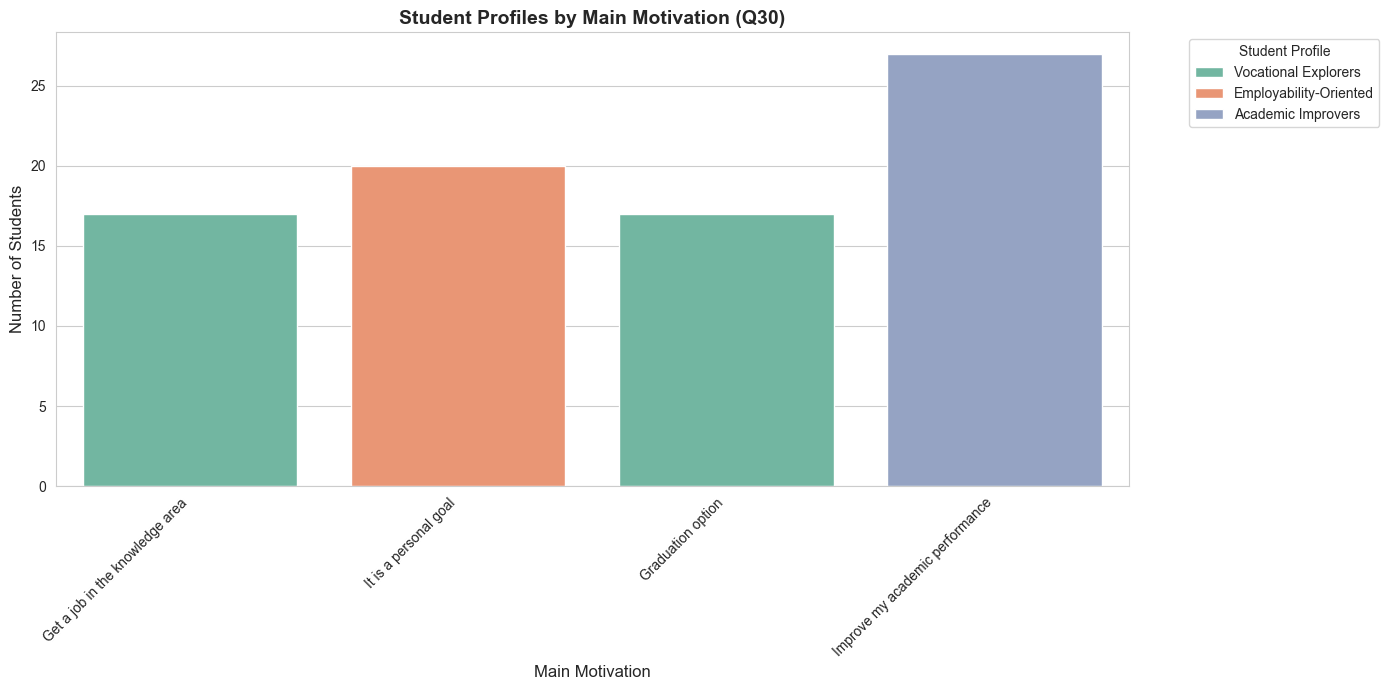

In [13]:
plt.figure(figsize=(14, 7))
sns.countplot(data=df, x='Q30', hue='Profile_Name', palette='Set2')
plt.title('Student Profiles by Main Motivation (Q30)', fontsize=14, fontweight='bold')
plt.xlabel('Main Motivation', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Student Profile', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Visualization 2: Programming Enjoyment by Profile

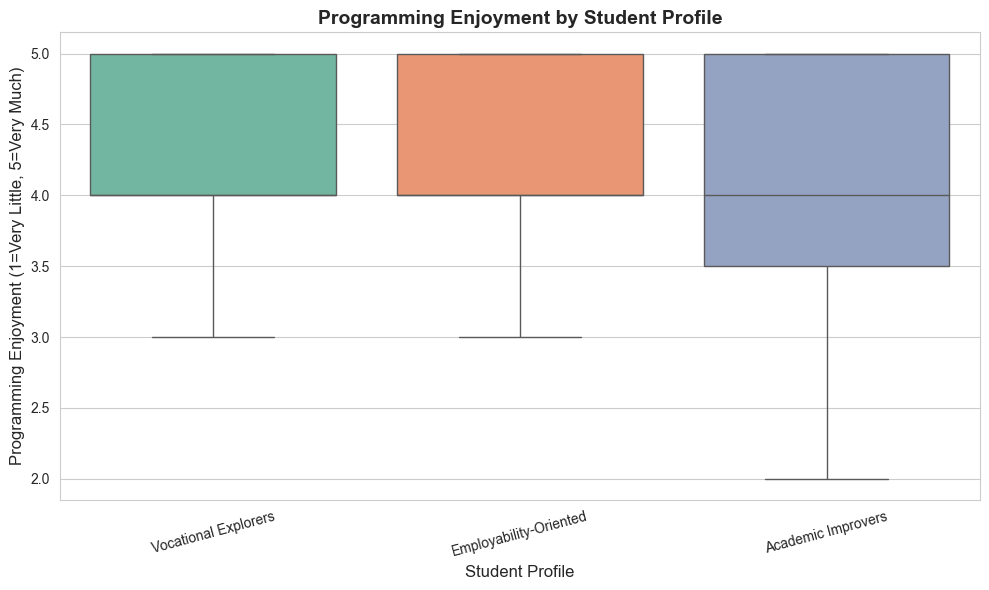

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Profile_Name', y='Q6', palette='Set2')
plt.title('Programming Enjoyment by Student Profile', fontsize=14, fontweight='bold')
plt.xlabel('Student Profile', fontsize=12)
plt.ylabel('Programming Enjoyment (1=Very Little, 5=Very Much)', fontsize=12)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

### Visualization 3: Weekly Practice Hours by Profile

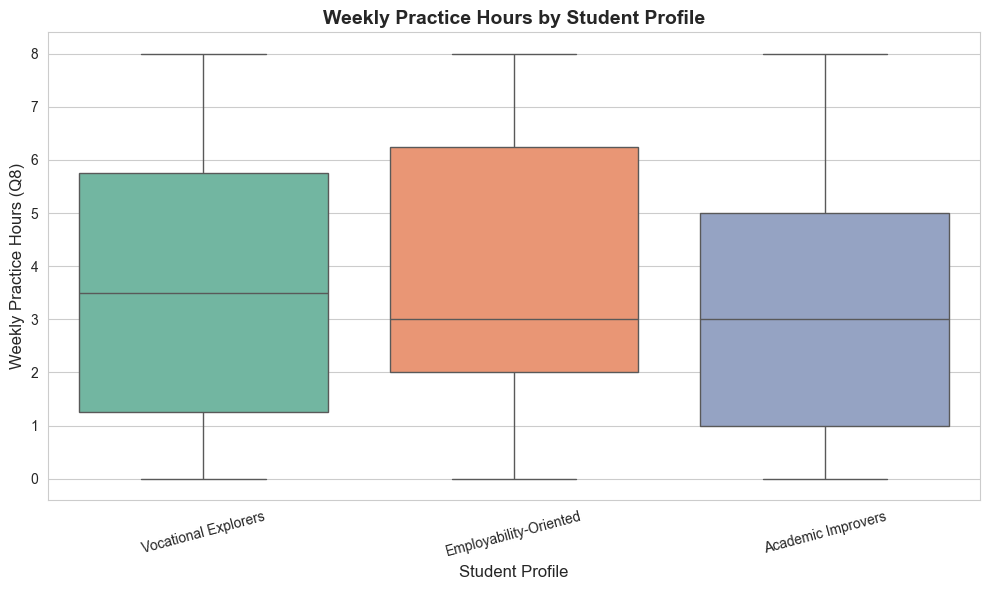

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Profile_Name', y='Q8', palette='Set2')
plt.title('Weekly Practice Hours by Student Profile', fontsize=14, fontweight='bold')
plt.xlabel('Student Profile', fontsize=12)
plt.ylabel('Weekly Practice Hours (Q8)', fontsize=12)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

### Visualization 4: Professional Interest Areas by Profile

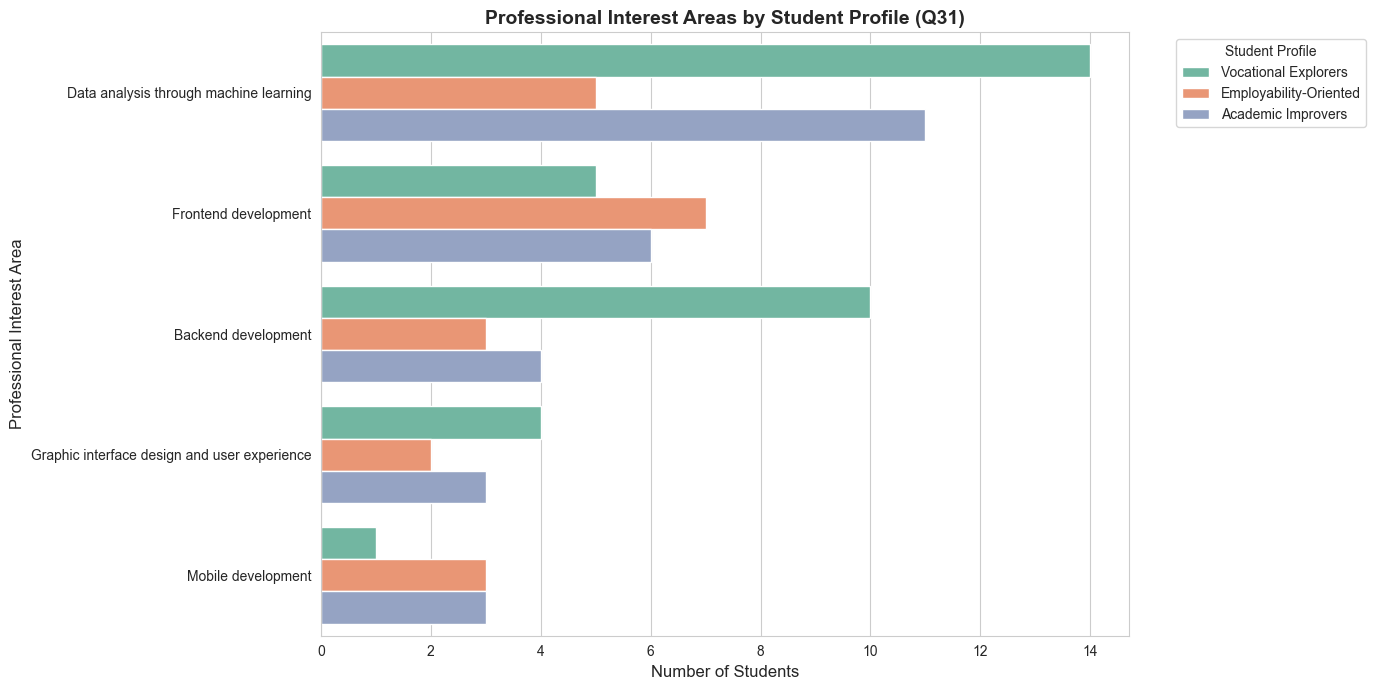

In [16]:
plt.figure(figsize=(14, 7))
sns.countplot(data=df, y='Q31', hue='Profile_Name', palette='Set2', order=df['Q31'].value_counts().index)
plt.title('Professional Interest Areas by Student Profile (Q31)', fontsize=14, fontweight='bold')
plt.xlabel('Number of Students', fontsize=12)
plt.ylabel('Professional Interest Area', fontsize=12)
plt.legend(title='Student Profile', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Visualization 5: Comprehensive Profile Comparison


=== Average Characteristics by Student Profile ===
                        Semester  Programming Enjoyment  Study Hours/Week  \
Profile_Name                                                                
Academic Improvers          2.63                   4.07              3.04   
Employability-Oriented      2.45                   4.35              2.40   
Vocational Explorers        2.38                   4.29              3.24   

                        Practice Hours/Week  Courses Taken  
Profile_Name                                                
Academic Improvers                     3.26           3.78  
Employability-Oriented                 3.80           2.75  
Vocational Explorers                   3.74           3.82  


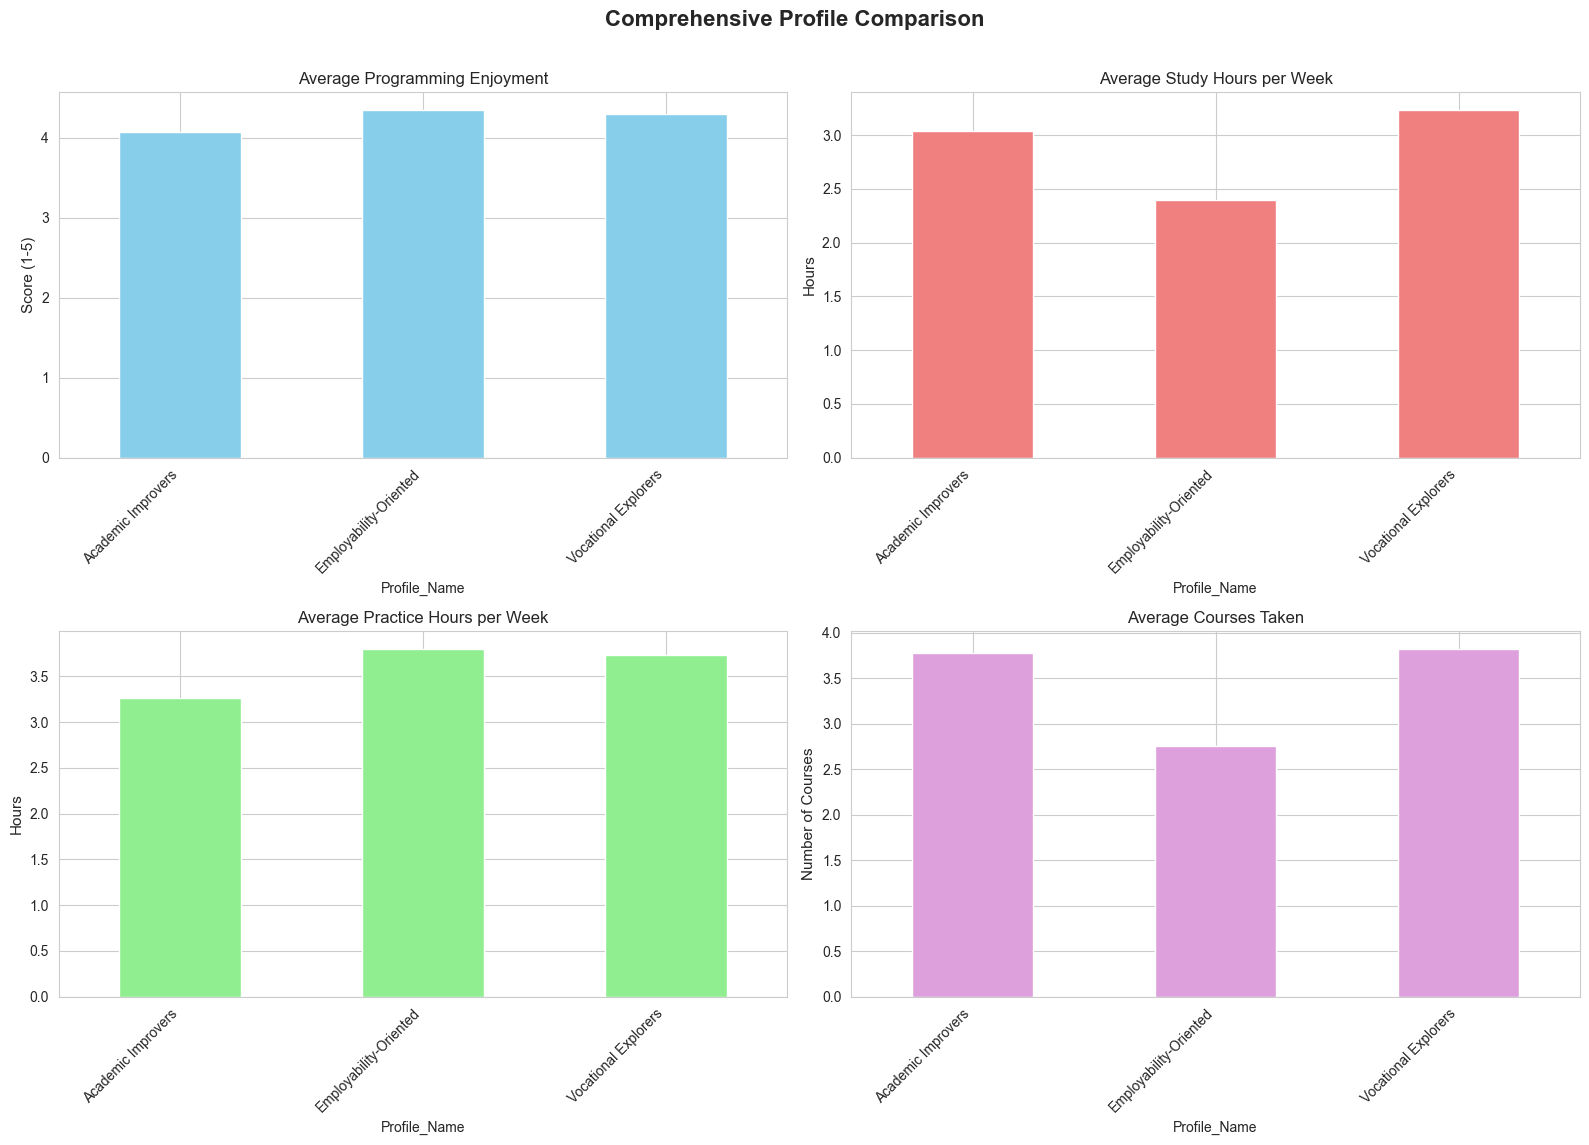

In [17]:
# Create summary statistics by profile
profile_summary = df.groupby('Profile_Name')[['Q5', 'Q6', 'Q7', 'Q8', 'Q9']].mean()
profile_summary.columns = ['Semester', 'Programming Enjoyment', 'Study Hours/Week', 
                           'Practice Hours/Week', 'Courses Taken']

print("\n=== Average Characteristics by Student Profile ===")
print(profile_summary.round(2))

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Comprehensive Profile Comparison', fontsize=16, fontweight='bold')

# Programming Enjoyment
profile_summary['Programming Enjoyment'].plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Average Programming Enjoyment', fontsize=12)
axes[0, 0].set_ylabel('Score (1-5)', fontsize=11)
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha='right')

# Study Hours
profile_summary['Study Hours/Week'].plot(kind='bar', ax=axes[0, 1], color='lightcoral')
axes[0, 1].set_title('Average Study Hours per Week', fontsize=12)
axes[0, 1].set_ylabel('Hours', fontsize=11)
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha='right')

# Practice Hours
profile_summary['Practice Hours/Week'].plot(kind='bar', ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Average Practice Hours per Week', fontsize=12)
axes[1, 0].set_ylabel('Hours', fontsize=11)
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha='right')

# Courses Taken
profile_summary['Courses Taken'].plot(kind='bar', ax=axes[1, 1], color='plum')
axes[1, 1].set_title('Average Courses Taken', fontsize=12)
axes[1, 1].set_ylabel('Number of Courses', fontsize=11)
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

### Visualization 6: Profile Distribution in PCA Space

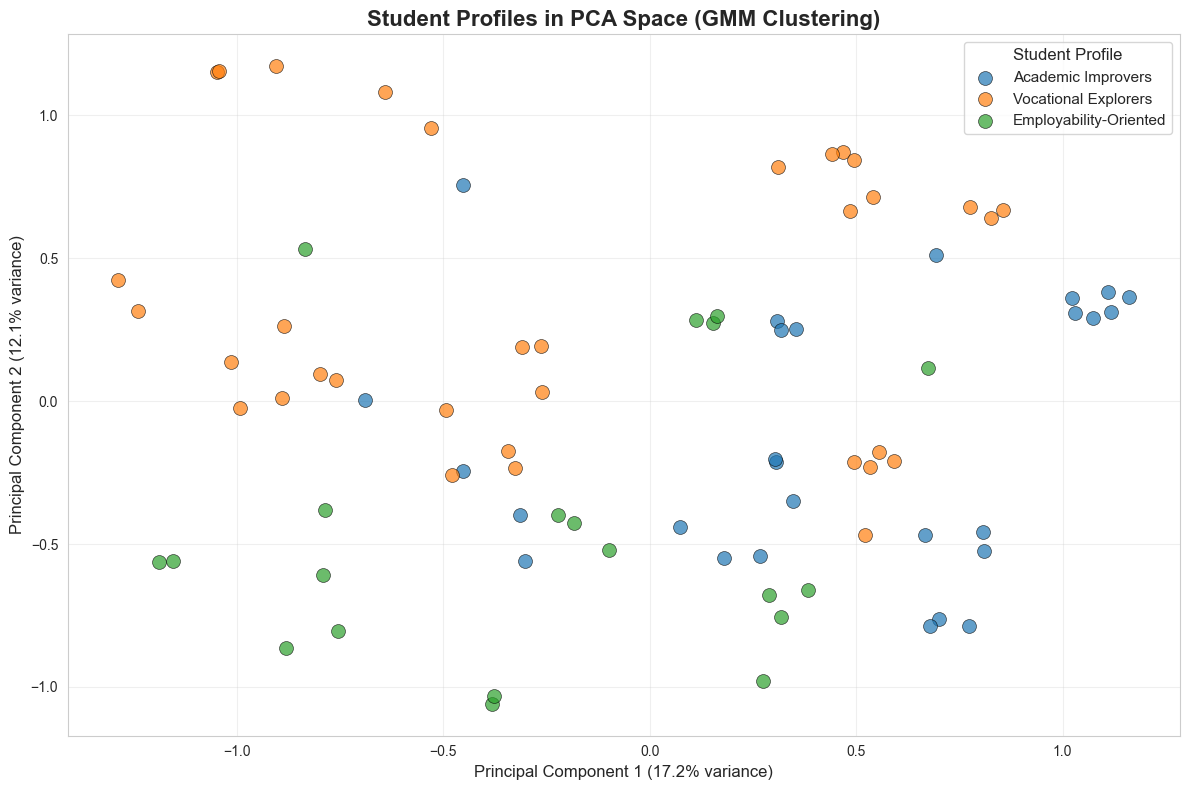

In [18]:
# Create enhanced PCA visualization with profile names
plt.figure(figsize=(12, 8))
for profile_id, profile_name in profile_names.items():
    mask = df['Final_Cluster'] == profile_id
    plt.scatter(data_pca[mask, 0], data_pca[mask, 1], 
                label=profile_name, s=100, alpha=0.7, edgecolors='black', linewidth=0.5)

plt.title('Student Profiles in PCA Space (GMM Clustering)', fontsize=16, fontweight='bold')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.1%} variance)', fontsize=12)
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.1%} variance)', fontsize=12)
plt.legend(title='Student Profile', fontsize=11, title_fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Final Conclusions

### 1. Clustering Justification
The initial EDA conclusively confirmed that the student population is diverse in their motivations and habits, making segmentation an appropriate and necessary analysis strategy.

### 2. Algorithm Performance
- **GMM (Gaussian Mixture Model)** achieved the highest Silhouette Score (0.146), indicating the best cluster quality.
- **K-Means** excelled in Calinski-Harabasz Score (11.46), showing excellent cluster separation.
- **Agglomerative Clustering** demonstrated consistent performance across all metrics.
- **DBSCAN** was not suitable for this dataset structure.

### 3. Identified Student Profiles

#### **Academic Improvers (Cluster 0)**
- **Core Motivation:** Intrinsic drive toward formal research and scientific production
- **Key Variables:**
  - Q30: "Improve my academic performance" (primary motivation)
  - Q10: "Learn meaningfully" and "Specialize in a knowledge area"
  - Q31: Strong preference for "Data analysis through machine learning"
  - Q6: High programming enjoyment (avg 4.2/5)
  - Q7-Q8: Higher study and practice hours
- **Behavioral Pattern:** Committed to academic excellence and research-oriented activities

#### **Vocational Explorers (Cluster 1)**
- **Core Motivation:** Discovery phase of professional interests
- **Key Variables:**
  - Q30: "It is a personal goal" (primary motivation)
  - Q10: "Develop my soft skills (Interpersonal qualities)"
  - Q31: Diverse interests (Frontend, Mobile, UX/UI design)
  - Q6: Moderate programming enjoyment (avg 3.5/5)
  - Q8: Variable practice hours, exploring different areas
- **Behavioral Pattern:** Open-minded exploration of various professional paths

#### **Employability-Oriented (Cluster 2)**
- **Core Motivation:** Developing specific competencies for the job market
- **Key Variables:**
  - Q30: "Get a job in the knowledge area" (primary motivation)
  - Q10: "Specialize in a knowledge area" with practical focus
  - Q31: Strong preference for "Backend development"
  - Q6: Pragmatic programming enjoyment (avg 3.8/5)
  - Q7-Q8: Strategic allocation of study hours
- **Behavioral Pattern:** Goal-oriented learning aligned with market demands

### 4. Recommendations

**For Academic Improvers:**
- Provide advanced research opportunities and mentorship
- Encourage participation in scientific publications and conferences
- Offer specialized courses in machine learning and data science

**For Vocational Explorers:**
- Create diverse project experiences across multiple domains
- Facilitate networking and soft skills development workshops
- Provide career counseling and professional orientation sessions

**For Employability-Oriented:**
- Connect with industry partners for internship opportunities
- Focus on practical, market-relevant skill development
- Offer portfolio-building projects and technical interview preparation

### 5. Final Recommendation
From a purely statistical cluster quality standpoint, **GMM (Gaussian Mixture Model) is the best choice**, as it achieved the highest silhouette score. The three identified profiles provide a robust framework for understanding student motivations and tailoring educational interventions accordingly.

## Export Results

Save the clustered data with profile assignments for further analysis.

In [19]:
# Export results to Excel
output_columns = ['Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q23', 'Q25', 'Q30', 'Q31', 
                  'Final_Cluster', 'Profile_Name']
df[output_columns].to_excel('MAMBA_Student_Profiles_Results.xlsx', index=False)

print("Results exported successfully to 'MAMBA_Student_Profiles_Results.xlsx'")
print(f"\nFinal profile distribution:")
print(df['Profile_Name'].value_counts())

Results exported successfully to 'MAMBA_Student_Profiles_Results.xlsx'

Final profile distribution:
Profile_Name
Vocational Explorers      34
Academic Improvers        27
Employability-Oriented    20
Name: count, dtype: int64
